### **MODELO PREDICCIÓN DE PRECIOS EN VEHÍCULOS USADOS**

## 1.**DATASET**

# 1.1 Importación de datos

In [1]:
#LIBRERIAS NECESARIAS
import sklearn
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ML/datacars_depurado.csv', encoding='ISO-8859-1', delimiter=';')

Mounted at /content/drive


In [3]:
display(data)

,MARCA,MODELO,PRECIO,AÑO DE REGISTRO,GEARBOX,POTENCIA (PS),POTENCIA (CABALLOS),KILOMETRAJE,COMBUSTIBLE,DAÑOS
0,alfa_romeo,spider,24900,1973,manual,131,"129,19",10000,gasolina,Sin daños
1,volkswagen,kaefer,23900,1973,manual,120,"118,34",90000,gasolina,Sin daños
2,mercedes_benz,sl,23900,1973,automatico,193,"190,34",100000,gasolina,Sin daños
3,mercedes_benz,sl,21750,1973,automatico,200,"197,24",150000,gasolina,Sin daños
4,volkswagen,transporter,16000,1973,manual,114,"112,43",80000,gasolina,Sin daños
...,...,...,...,...,...,...,...,...,...,...
253177,ford,mondeo,4800,2019,manual,160,"157,79",150000,gasolina,Sin daños
253178,fiat,punto,1999,2019,manual,80,"78,9",90000,gasolina,Sin daños
253179,mercedes_benz,c_klasse,1800,2019,manual,122,"120,32",150000,gasolina,Sin daños
253180,alfa_romeo,156,1200,2019,manual,140,"138,07",150000,gasolina,Sin daños


# 1.2 Análisis e ingeniería de Datos

In [4]:
#Procesamiento y tratamiento de la base de datos
# Creamos una copia explícita del DataFrame para evitar SettingWithCopyWarning
data = data.copy()

# Eliminamos filas donde la potencia es 0
data = data[data!= 0]

# Reemplazamos todos los 0 por NaN
data.replace(0, pd.NA, inplace=True)

# Eliminamos todas las filas que contengan al menos un NaN
data.dropna(inplace=True)

# Renombramos a la columna 'POTENCIA (CABALLOS)' por 'CV'
data.rename(columns={'POTENCIA (CABALLOS)': 'CV'}, inplace=True)

# Sustituimos en los datos de la columna 'CV' las , por .
data['CV'] = data['CV'].str.replace(',', '.').astype(float)

# Creamos la columna 'NOMBRE' que combina las columnas 'MARCA' y 'MODELO'
data['NOMBRE'] = data['MARCA'] + "_" + data['MODELO']

# Eliminamos la columna 'POTENCIA (PS)'
data.drop('POTENCIA (PS)', axis=1, inplace=True)

# Creamos la columna 'EDAD' con la que sacamos los años que tiene actualmente el coche
data['EDAD'] = 2024 - data['AÑO DE REGISTRO']

# Eliminamos la columna 'AÑO DE REGISTRO'
data.drop('AÑO DE REGISTRO', axis=1, inplace=True)

# Eliminar las muestras con algún atributo en blanco
data.dropna(inplace=True)

# Verificamos las primeras filas del DataFrame modificado
display(data)

,MARCA,MODELO,PRECIO,GEARBOX,CV,KILOMETRAJE,COMBUSTIBLE,DAÑOS,NOMBRE,EDAD
0,alfa_romeo,spider,24900,manual,129.19,10000,gasolina,Sin daños,alfa_romeo_spider,51
1,volkswagen,kaefer,23900,manual,118.34,90000,gasolina,Sin daños,volkswagen_kaefer,51
2,mercedes_benz,sl,23900,automatico,190.34,100000,gasolina,Sin daños,mercedes_benz_sl,51
3,mercedes_benz,sl,21750,automatico,197.24,150000,gasolina,Sin daños,mercedes_benz_sl,51
4,volkswagen,transporter,16000,manual,112.43,80000,gasolina,Sin daños,volkswagen_transporter,51
...,...,...,...,...,...,...,...,...,...,...
253177,ford,mondeo,4800,manual,157.79,150000,gasolina,Sin daños,ford_mondeo,5
253178,fiat,punto,1999,manual,78.90,90000,gasolina,Sin daños,fiat_punto,5
253179,mercedes_benz,c_klasse,1800,manual,120.32,150000,gasolina,Sin daños,mercedes_benz_c_klasse,5
253180,alfa_romeo,156,1200,manual,138.07,150000,gasolina,Sin daños,alfa_romeo_156,5


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comprobamos si hay valores faltantes
print(data.isnull().sum())

MARCA          0
MODELO         0
PRECIO         0
GEARBOX        0
CV             0
KILOMETRAJE    0
COMBUSTIBLE    0
DAÑOS          0
NOMBRE         0
EDAD           0
dtype: int64


In [6]:
# Hacemos un análisis estadístico básico
print(data.describe())

              PRECIO             CV    KILOMETRAJE           EDAD
count  253182.000000  253182.000000  253182.000000  253182.000000
mean     6346.127142     125.998494  126257.079887      19.875793
std      7016.658914      54.223965   37631.662803       5.947088
min       300.000000      51.280000    5000.000000       5.000000
25%      1680.000000      86.790000  100000.000000      16.000000
50%      3900.000000     114.400000  150000.000000      20.000000
75%      8493.000000     147.930000  150000.000000      24.000000
max     70000.000000     399.410000  150000.000000      51.000000


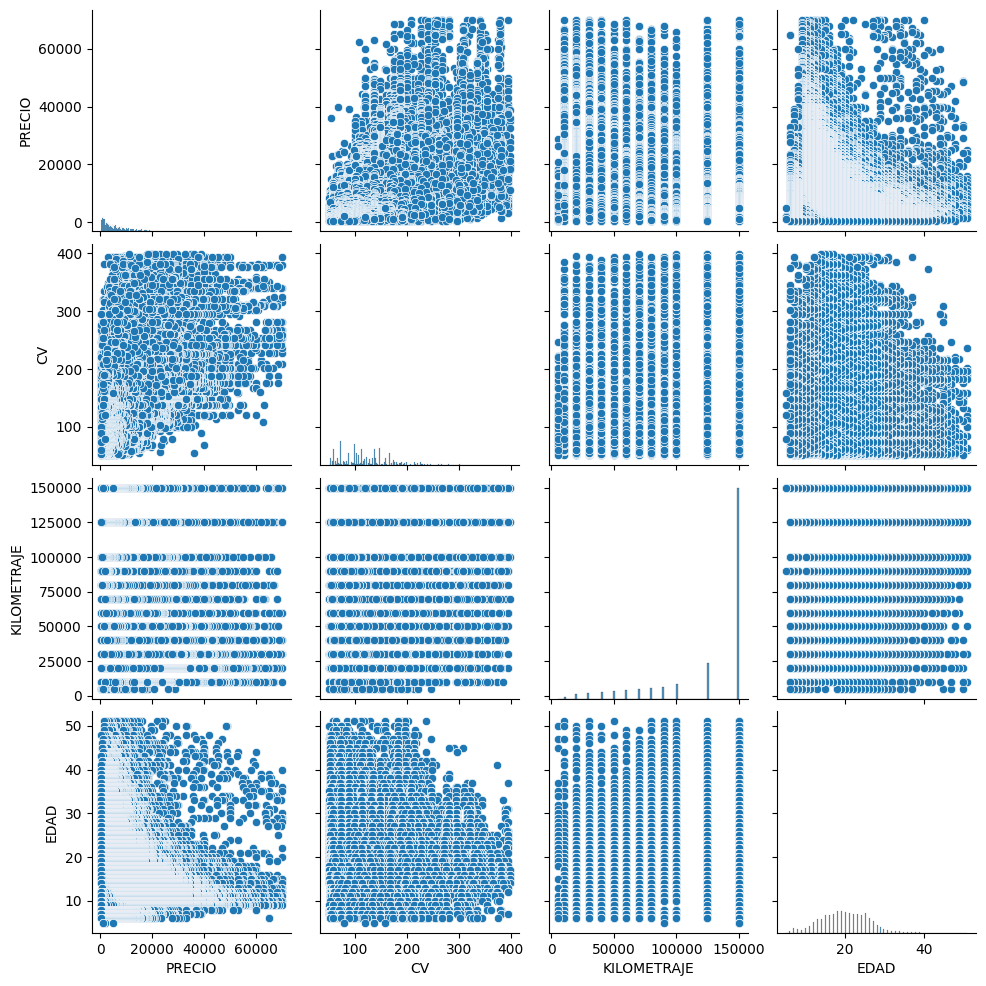

In [7]:
# Sacamos las visualizaciones para una mejor comprensión de los datos
sns.pairplot(data)
plt.show()

# 1.3 Adaptación de datos a modelización

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creamos una instancia separada de LabelEncoder para cada columna categórica
nombre_encoder = LabelEncoder()
fuel_encoder = LabelEncoder()
gearbox_encoder = LabelEncoder()
damage_encoder = LabelEncoder()

# Hacemos la codificación de cada columna
data['Nombre_encoded'] = nombre_encoder.fit_transform(data['NOMBRE'])
data['fuel_encoded'] = fuel_encoder.fit_transform(data['COMBUSTIBLE'])
data['gearbox_encoded'] = gearbox_encoder.fit_transform(data['GEARBOX'])
data['damage_encoded'] = damage_encoder.fit_transform(data['DAÑOS'])

# Eliminamos las columnas originales
data.drop(['MARCA', 'MODELO', 'NOMBRE', 'COMBUSTIBLE', 'GEARBOX', 'DAÑOS'], axis=1, inplace=True)


In [9]:
display(data)

,PRECIO,CV,KILOMETRAJE,EDAD,Nombre_encoded,fuel_encoded,gearbox_encoded,damage_encoded
0,24900,129.19,10000,51,4,3,1,1
1,23900,118.34,90000,51,237,3,1,1
2,23900,190.34,100000,51,135,3,0,1
3,21750,197.24,150000,51,135,3,0,1
4,16000,112.43,80000,51,247,3,1,1
...,...,...,...,...,...,...,...,...
253177,4800,157.79,150000,5,76,3,1,1
253178,1999,78.90,90000,5,64,3,1,1
253179,1800,120.32,150000,5,126,3,1,1
253180,1200,138.07,150000,5,2,3,1,1


## 2.MODELOS

# 2.1 Separación del conjunto de datos

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('PRECIO', axis=1)   # Todas las columnas excepto la variable objetivo
y = data['PRECIO']                # Variable objetivo

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento, validacion y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train_val, X_val, y_train_val, y_val= train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [12]:
#Miramos los tamaños de los conjuntos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(" ")
print(X_train_val.shape)
print(X_val.shape)
print(y_train_val.shape)
print(y_val.shape)

(202545, 7)
(50637, 7)
(202545,)
(50637,)
 
(141781, 7)
(60764, 7)
(141781,)
(60764,)


*   `[X_train_val, y_train_val]`
*   `[X_val, y_val]`
*   `[X_test, y_test]`

In [13]:
#ESTANDARIZAMOS LAS VARIABLES
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_val)   #Guardamos en Scaler la media y varianza de X_train_val

X_train_s=scaler.transform(X_train_val)
X_val_s=scaler.transform(X_val)
X_test_s=scaler.transform(X_test)

*   `[X_train_s, y_train_val]`
*   `[X_val_s, y_val]`
*   `[X_test_s, y_test]`

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
def graph(title, Y_real, Y_pred):
 fig, ax = plt.subplots()
 ax.scatter(Y_real, Y_pred)
 min = Y_real.min()
 max = Y_real.max()
 ax.plot([min, max], [min, max], 'r-')
 ax.set_xlabel('Real')
 ax.set_ylabel('Predicted')
 plt.title(title)
 plt.show()
 print("MSE: {}".format(mean_squared_error(Y_real, Y_pred)))

# 2.2 Modelos Lineales

Linear regression

In [15]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train_s, y_train_val)
y_pred =LR.predict(X_test_s)

In [16]:

print("R^2 es:",np.round(LR.score(X_test_s, y_test),2))

diff=np.subtract(y_test,y_pred)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error (RMSE) es:", np.round(RMSE,2))

R^2 es: 0.65
Root Mean Square Error (RMSE) es: 4149.55


In [17]:
s_train_lr = LR.predict(X_train_s)

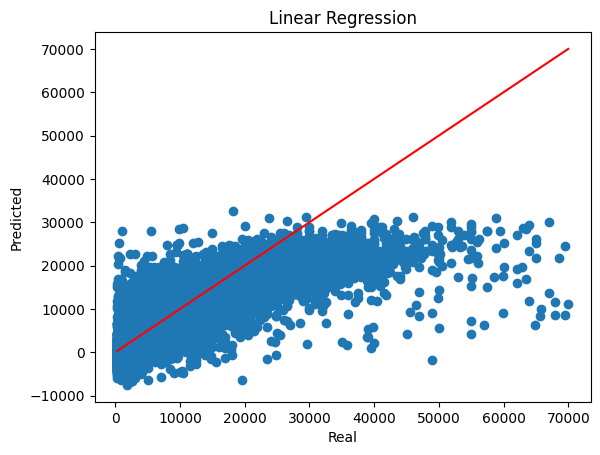

MSE: 17218758.456733204


In [18]:
graph("Linear Regression", y_test, y_pred)

Linear Ridge Regression

1e-05 : 0.6430981938467667
0.0001 : 0.6430981938444167
0.001 : 0.6430981938209173
0.01 : 0.6430981935859201
0.1 : 0.6430981912357092
1 : 0.6430981677096251
10 : 0.6430979300518276
100 : 0.643095314357403
200 : 0.6430919005789647


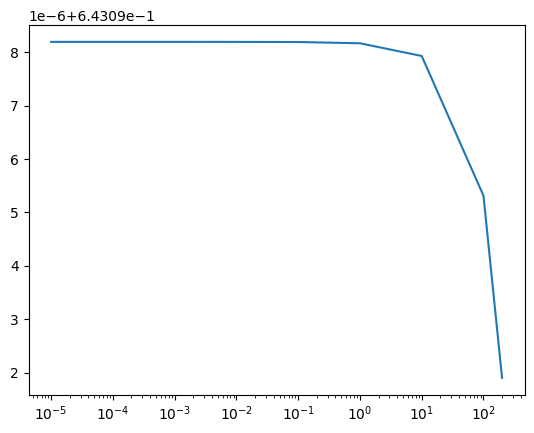

In [20]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

Ralph=[1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 200]
b=0
for alpha in Ralph:
  Rd = Ridge(alpha)
  Rd.fit(X_train_s, y_train_val)
  Ralph[b]= Rd.score(X_val_s, y_val)
  b=b+1
  print(np.round(alpha,6),":",Ralph[b-1])

fig, ax = plt.subplots()
ax.semilogx([1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 200], Ralph)
plt.show()

In [21]:
ll=[1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 200]
print("Alpha maxima:", ll[Ralph.index(np.max(Ralph))])

Rd = Ridge(ll[Ralph.index(np.max(Ralph))])
Rd.fit(X_train_s, y_train_val)
y_pred =Rd.predict(X_test_s)

Alpha maxima: 1e-05


In [22]:
print("R^2: ",np.round(Rd.score(X_test_s, y_test),2))

diff=np.subtract(y_test,y_pred)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", np.round(RMSE,2))

R^2:  0.65
Root Mean Square Error: 4149.55


In [23]:
ridge_best = Ridge(alpha=ll[Ralph.index(np.max(Ralph))])
ridge_best.fit(X_train_s, y_train_val)
s_ridge = ridge_best.predict(X_train_s)


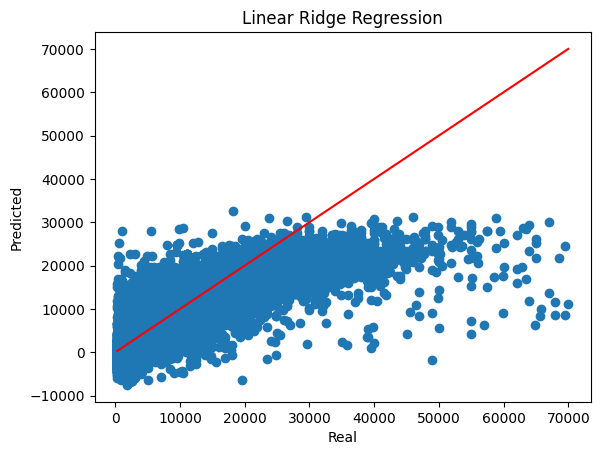

MSE: 17218758.456718285


In [24]:
graph("Linear Ridge Regression", y_test, y_pred)

Linear Lasso Regression

0.001 : 0.6430981929974748
0.01 : 0.6430981850948716
0.05 : 0.6430981521080739
0.1 : 0.6430981034307643
1 : 0.643097176043246
5 : 0.643090647281071
10 : 0.6430773951660498


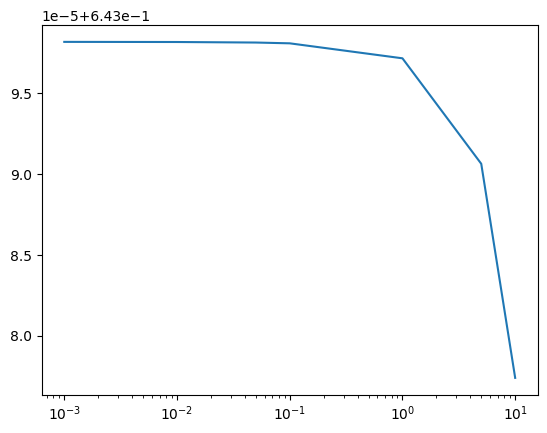

In [26]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

Ralph=[0.001, 0.01, 0.05, 0.1, 1, 5, 10]
b=0

for alpha in Ralph:
  Ll = Lasso(alpha)
  Ll.fit(X_train_s, y_train_val)
  Ralph[b]= Ll.score(X_val_s, y_val)
  b=b+1
  print(np.round(alpha,6),":",Ralph[b-1])

fig, ax = plt.subplots()
ax.semilogx([0.001, 0.01, 0.05, 0.1, 1, 5, 10], Ralph)
plt.show()

In [27]:
ll=[0.001, 0.01, 0.05, 0.1, 1, 5, 10]
print("Alpha maxima:", ll[Ralph.index(np.max(Ralph))])

Ll = Lasso(ll[Ralph.index(np.max(Ralph))])
Ll.fit(X_train_s, y_train_val)
y_pred =Ll.predict(X_test_s)

Alpha maxima: 0.001


In [28]:
print(np.round(Ll.score(X_test_s, y_test),2))

diff=np.subtract(y_test,y_pred)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", np.round(RMSE,2))

0.65
Root Mean Square Error: 4149.55


In [29]:
Ll = Lasso(ll[Ralph.index(np.max(Ralph))])
Ll.fit(X_train_s, y_train_val)
s_ridge = Ll.predict(X_train_s)


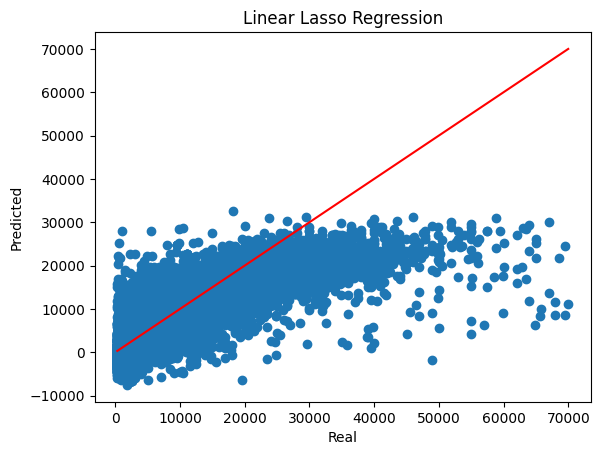

MSE: 17218758.52394337


In [30]:
graph("Linear Lasso Regression", y_test, y_pred)

KERNEL RIDGE REGRESSION

In [ ]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=0.01, kernel='rbf', gamma=0.05)
krr.fit(X_train_s, y_train_val)
y_pred =krr.predict(X_test_s)

In [ ]:
print(np.round(krr.score(X_test_s, y_test),2))

diff=np.subtract(y_test,y_pred)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", np.round(RMSE,2))

In [ ]:
graph("Kernel Ridge Regression", y_test, y_pred)

# 2.3 Modelos no lineales

Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo
RF_model = RandomForestRegressor(random_state=42)

# Vamos a averiguar  los hiperparámetros óptimos
# Modicar grid para probar los hiperparámetros
grid = {
        'n_estimators': [350],  # Número de árboles
        'max_features': ['sqrt'],  # Número de características a considerar en cada split
        'max_depth': [20],         # Máxima profundidad de los árboles
        }

# Creamos GridSearchCV (val. cruzada)
grid_search = GridSearchCV(estimator=RF_model,
                           param_grid=grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Cogemos los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 350}


In [79]:
# Aplicamos el mejor modelo ajustado
RF_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = RF_model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')
feature_importance = RF_model.feature_importances_
print(feature_importance)


RMSE: 2096.892097531553
R^2 Score: 0.9101051158295179
[0.30831497 0.15503696 0.33630224 0.10868495 0.03751083 0.04473421
 0.00941584]


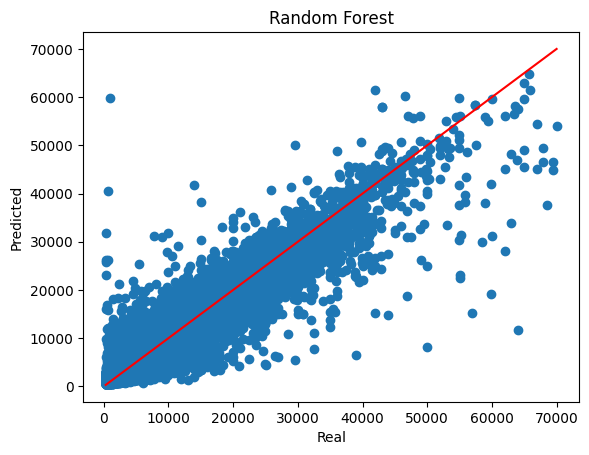

MSE: 4396956.468690277


In [80]:

graph("Random Forest", y_test, y_pred)


GradienrBoostingRegressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
#Utilizamos la información de los hiperparámetros óptimos averiguados en Random Forest
gbm = GradientBoostingRegressor(n_estimators=350, learning_rate=0.2, max_depth=20, random_state=42)
gbm.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.2, max_depth=20, n_estimators=350,
                          random_state=42)

LabelEncoder()
RMSE: 2370.8845348732702
R^2: 0.8850778826928161


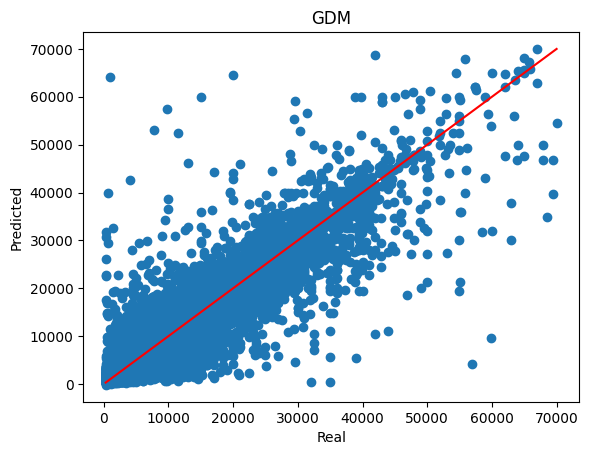

MSE: 5621093.477701242


In [82]:
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(fuel_encoder)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
graph("GDM", y_test, y_pred)

In [65]:
nombre_mapping = dict(zip(nombre_encoder.classes_, nombre_encoder.transform(nombre_encoder.classes_)))
print(nombre_mapping)

fuel_mapping = dict(zip(fuel_encoder.classes_, fuel_encoder.transform(fuel_encoder.classes_)))
print(fuel_mapping)

['cng', 'diesel', 'electrico', 'gasolina', 'hibrido', 'lpg', 'otro']
{'alfa_romeo_145': 0, 'alfa_romeo_147': 1, 'alfa_romeo_156': 2, 'alfa_romeo_159': 3, 'alfa_romeo_spider': 4, 'audi_100': 5, 'audi_200': 6, 'audi_80': 7, 'audi_90': 8, 'audi_a1': 9, 'audi_a2': 10, 'audi_a3': 11, 'audi_a4': 12, 'audi_a5': 13, 'audi_a6': 14, 'audi_a8': 15, 'audi_q3': 16, 'audi_q5': 17, 'audi_q7': 18, 'audi_tt': 19, 'bmw_1er': 20, 'bmw_3er': 21, 'bmw_5er': 22, 'bmw_6er': 23, 'bmw_7er': 24, 'bmw_i3': 25, 'bmw_m_reihe': 26, 'bmw_x_reihe': 27, 'bmw_z_reihe': 28, 'chevrolet_aveo': 29, 'chevrolet_captiva': 30, 'chevrolet_matiz': 31, 'chevrolet_spark': 32, 'chrysler_300c': 33, 'chrysler_crossfire': 34, 'chrysler_grand': 35, 'chrysler_ptcruiser': 36, 'chrysler_voyager': 37, 'citroen_berlingo': 38, 'citroen_c1': 39, 'citroen_c2': 40, 'citroen_c3': 41, 'citroen_c4': 42, 'citroen_c5': 43, 'dacia_duster': 44, 'dacia_lodgy': 45, 'dacia_logan': 46, 'dacia_sandero': 47, 'daewoo_kalos': 48, 'daewoo_lanos': 49, 'daewoo_m

### 3.Aplicación del modelo

# Prueba con conjunto de datos sintético

In [84]:

# Creación de un DataFrame con las muestras sintéticas
synthetic_samples = pd.DataFrame({
    "PRECIO": [12727, 10491, 13795, 13924, 9885],
    "CV":[150,160,100,120,90],
    "KILOMETRAJE": [108153, 104232, 76763, 130889, 76116],
    "EDAD": [12, 8, 11, 13, 15],
    "Nombre_encoded": [74, 14, 18, 10, 22],
    "fuel_encoded": [3, 3, 1, 1, 3],
    "gearbox_encoded": [1, 1, 1, 0, 1],
    "damage_encoded":[1,0,0,1,1]
})

# Separando la característica objetivo (price) y las características independientes
X_synthetic = synthetic_samples.drop('PRECIO', axis=1)
y_synthetic = synthetic_samples['PRECIO']

# Realizando predicciones con el modelo
predicted_prices = RF_model.predict(X_synthetic)

# Comparando los precios reales con los predichos
for real, predicted in zip(y_synthetic, predicted_prices):
    print(f"Real: {real}, Predicted: {predicted}")



Real: 12727, Predicted: 12186.8453236282
Real: 10491, Predicted: 7899.397222222222
Real: 13795, Predicted: 11956.88857142857
Real: 13924, Predicted: 12864.658608734866
Real: 9885, Predicted: 9253.0629613924


# Simulación de aplicación Real

In [75]:


def input_data():
    # Pedir al usuario que introduzca los detalles del coche
    nombre = input("Introduce el nombre del coche (marca y modelo): ")
    cv=input("Introduce cv: ")
    kms= int(input("Introduce el kilometraje del coche: "))
    car_age = int(input("Introduce la edad del coche: "))
    fuel = input("Introduce el tipo de combustible (Gasolina, Diésel, etc.): ")
    gearbox = input("Introduce el tipo de caja de cambios (Manual, Automática, etc.): ")
    damage= input("Daños?")

    return nombre,kms, car_age, fuel, gearbox, damage

def prepare_data(raw_data, nombre_encoder, fuel_encoder, gearbox_encoder):
    nombre,cv,kms, car_age, fuel, gearbox,damage = raw_data

    nombre_encoded = nombre_encoder.transform([nombre])[0]
    fuel_encoded = fuel_encoder.transform([fuel])[0]
    gearbox_encoded = gearbox_encoder.transform([gearbox])[0]
    damage_encoded = damage_encoder.transform([damage])[0]

    # Crear un DataFrame con los datos codificados
    data = pd.DataFrame([[cv,kms, car_age, nombre_encoded, fuel_encoded, gearbox_encoded,damage_encoded]],
                        columns=["CV",'KILOMETRAJE', 'EDAD', 'Nombre_encoded', 'fuel_encoded', 'gearbox_encoded',"damage_encoded"])

    return data

def predict_price(model, prepared_data):
    price_prediction =model.predict(prepared_data)
    return price_prediction[0]



In [76]:
raw_data = ("audi_a4",170,200000, 3, "diesel", "automatico","Con daños")
prepared_data = prepare_data(raw_data, nombre_encoder, fuel_encoder, gearbox_encoder)
predicted_price = predict_price(RF_model, prepared_data)
print(f"El precio estimado de venta para tu coche es: {predicted_price} €")

El precio estimado de venta para tu coche es: 6075.416142857142 €
